✅ Dataset Loaded Successfully!

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

🔎 Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

📊 Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


✅ Accuracy: 1.0


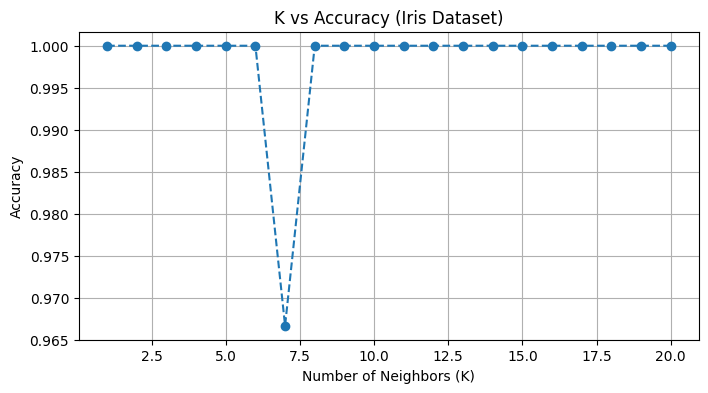


📏 Euclidean Distances (First 5 Rows):

   sepal_length  sepal_width  petal_length  petal_width species  Distance
0           5.1          3.5           1.4          0.2  setosa  0.141421
1           4.9          3.0           1.4          0.2  setosa  0.519615
2           4.7          3.2           1.3          0.2  setosa  0.469042
3           4.6          3.1           1.5          0.2  setosa  0.565685
4           5.0          3.6           1.4          0.2  setosa  0.141421


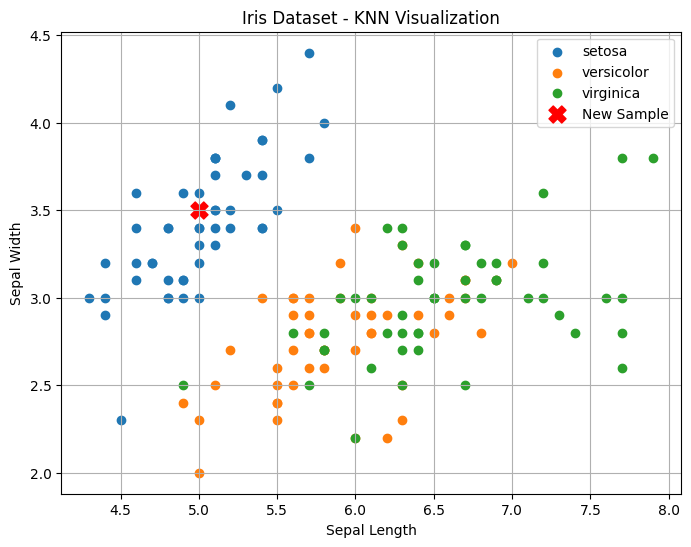

In [7]:
# 🧪 KNN Classification + Euclidean Distance + Visualization (Iris Dataset)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# 1️⃣ Load Dataset from Online Source
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv"
data = pd.read_csv(url)

print("✅ Dataset Loaded Successfully!\n")
print(data.head())

# 2️⃣ Features & Target
X = data[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = data['species']

# 3️⃣ Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4️⃣ Train KNN Model
k = 5
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

# 5️⃣ Predictions
y_pred = knn.predict(X_test)

print("\n🔎 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred))
print("\n✅ Accuracy:", round(accuracy_score(y_test, y_pred), 4))

# 6️⃣ K vs Accuracy Curve (Find Best K)
k_values = range(1, 21)
scores = []
for k in k_values:
    knn_temp = KNeighborsClassifier(n_neighbors=k)
    knn_temp.fit(X_train, y_train)
    scores.append(knn_temp.score(X_test, y_test))

plt.figure(figsize=(8,4))
plt.plot(k_values, scores, marker='o', linestyle='--')
plt.xlabel("Number of Neighbors (K)")
plt.ylabel("Accuracy")
plt.title("K vs Accuracy (Iris Dataset)")
plt.grid()
plt.show()

# 7️⃣ Problem 2: Euclidean Distance Calculation
new_flower = np.array([5.0, 3.5, 1.5, 0.2])
distances = []
for i, row in X.iterrows():
    d = np.sqrt(((row.values - new_flower) ** 2).sum())
    distances.append(d)

data['Distance'] = distances
print("\n📏 Euclidean Distances (First 5 Rows):\n")
print(data[['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species', 'Distance']].head())

# 8️⃣ Visualization (Scatter Plot with New Point)
plt.figure(figsize=(8,6))
for species in data['species'].unique():
    species_data = data[data['species'] == species]
    plt.scatter(species_data['sepal_length'], species_data['sepal_width'], label=species)

plt.scatter(new_flower[0], new_flower[1], color='red', marker='X', s=150, label='New Sample')
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.title("Iris Dataset - KNN Visualization")
plt.legend()
plt.grid()
plt.show()
